# Exploring Text Data
### Table of Contents
1. About the Dataset
2. Generating Word Frequency
3. EDA using Word Clouds
4. Text Cleaning

## 1. About the Dataset

In [1]:
!python -m spacy info


============================== Info about spaCy ==============================

spaCy version    3.7.4                         
Location         /usr/local/lib/python3.10/dist-packages/spacy
Platform         Linux-6.1.85+-x86_64-with-glibc2.35
Python version   3.10.12                       
Pipelines        en_core_web_sm (3.7.1)        



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/Courses/GettingStartedWithNPLcourseFromAnalysticsVidhya/Section5TextPreProcessing/tweets.zip

Archive:  /content/drive/MyDrive/Courses/GettingStartedWithNPLcourseFromAnalysticsVidhya/Section5TextPreProcessing/tweets.zip
  inflating: tweets.csv              


In [4]:
import pandas as pd

#Load the dataset
df = pd.read_csv('tweets.csv', encoding = 'ISO-8859-1')

In [5]:
# Printing shape of dataframe
print('Shape=>',df.shape)

Shape=> (5157, 14)


In [6]:
df.head()

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,RT @rssurjewala: Critical question: Was PayTM ...,False,0.0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331.0,True,False
1,RT @Hemant_80: Did you vote on #Demonetization...,False,0.0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66.0,True,False
2,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0.0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12.0,True,False
3,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0.0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338.0,True,False
4,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0.0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120.0,True,False


## 2. Generating Word Frequency

In [8]:
import spacy

In [9]:
# Loading model
nlp=spacy.load('en_core_web_sm')

In [45]:
# Combining tweets into a single string
combined_tweets=' '.join(df.text.values)
import re
combined_tweets = re.sub('\n', ' ', combined_tweets )

In [61]:
# all the tweets are store on this variable by seperating a space.
combined_tweets

'RT @rssurjewala: Critical question: Was PayTM informed about #Demonetization edict by PM? It\'s clearly fishy and requires full disclosure &amp;Â\x85 RT @Hemant_80: Did you vote on #Demonetization on Modi survey app? RT @roshankar: Former FinSec, RBI Dy Governor, CBDT Chair + Harvard Professor lambaste #Demonetization.\r \r If not for Aam Aadmi, listen to thÂ\x85 RT @ANI_news: Gurugram (Haryana): Post office employees provide cash exchange to patients in hospitals #demonetization https://t.co/uGMxUP9Â\x85 RT @satishacharya: Reddy Wedding! @mail_today cartoon #demonetization #ReddyWedding https://t.co/u7gLNrq31F @DerekScissors1: IndiaÂ\x92s #demonetization: #Blackmoney a symptom, not the disease https://t.co/HSl6Ihj0Qe via @ambazaarmag RT @gauravcsawant: Rs 40 lakh looted from a bank in Kishtwar in J&amp;K. Third such incident since #demonetization. That\'s how terrorists haveÂ\x85 RT @Joydeep_911: Calling all Nationalists to join...\r Walk for #CorruptionFreeIndia and spread the benef

In [46]:
# Creating Doc object
doc=nlp(combined_tweets)

In [47]:
# Function for generating word frequency
def gen_freq(tokens):

    # Creating a pandas series with word frequencies
    word_freq = pd.Series([token.text for token in tokens]).value_counts()

    # Printing frequencies
    print(word_freq[:20])

    return word_freq

In [48]:
# Getting word frequency
word_freq=gen_freq(doc)

#                 5770
demonetization    2523
.                 2313
:                 2029
Demonetization    2003
,                 1735
to                1659
                 1642
the               1593
of                1588
RT                1371
in                1343
\r                1288
is                1088
on                 946
a                  816
?                  723
and                711
India              685
's                 664
Name: count, dtype: int64


## 3. EDA using Word Clouds
**Note:-** You can install `WordCloud` library by -

`pip install wordcloud`

In [18]:
pip install wordcloud

In [19]:
#Importing libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [66]:
# Function for generating wordcloud
def generate_wordcloud(data):
    # Creating a wordcloud
    wc = WordCloud(width=400, height=330, max_words=200,background_color='white').generate_from_frequencies(data)

    # Setting Figure Size
    plt.figure(figsize=(14,12))

    # Display wordcloud as image
    plt.imshow(wc, interpolation='bilinear')

    # Removing all the axes
    plt.axis("off")

    plt.show()



In [67]:
print('No. of unique words =>', len(word_freq))


No. of unique words => 16562


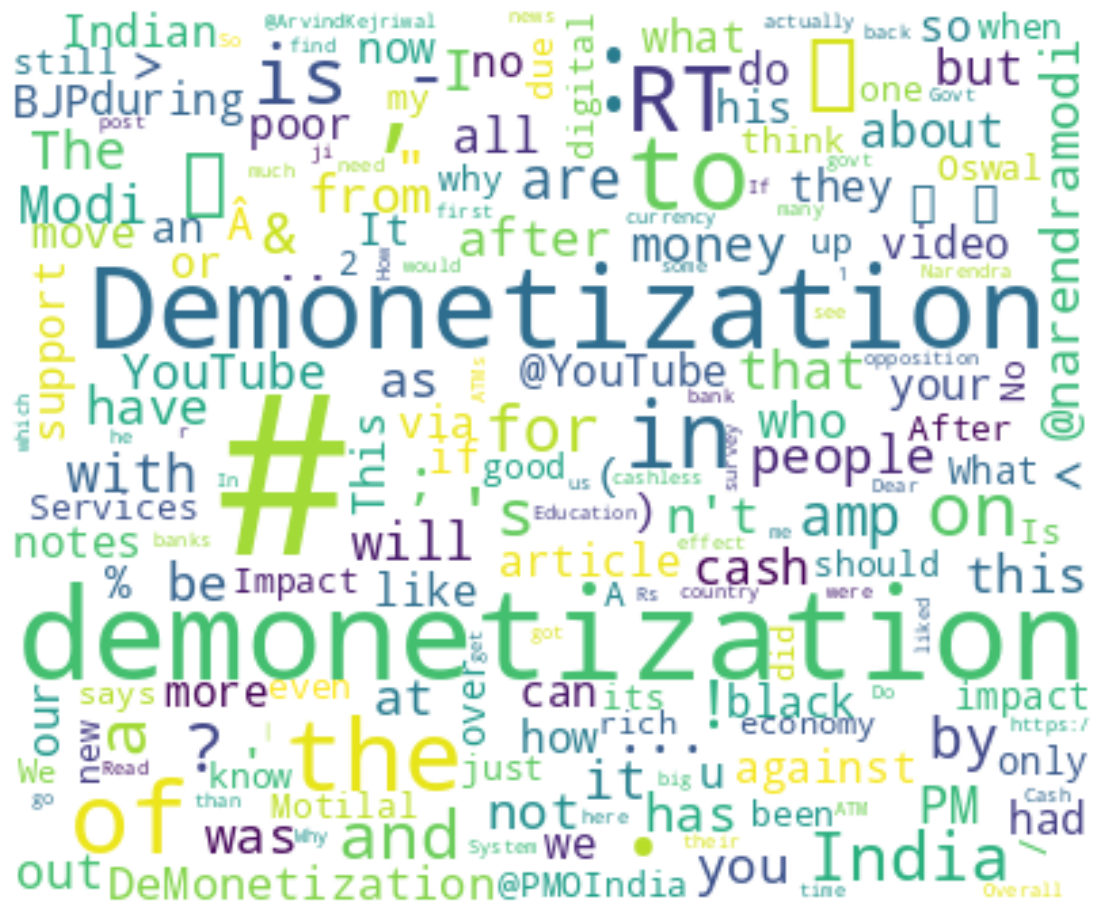

In [68]:
# Generating wordcloud
generate_wordcloud(word_freq)

## 4. Text Cleaning - Part-1

In [69]:
import re

In [70]:
# Removing RT and # from tweets
combined_tweets=re.sub('(RT|#)','',combined_tweets)

In [71]:
# Lowercasing the text
combined_tweets=combined_tweets.lower()

In [72]:
# Creating Doc object
doc=nlp(combined_tweets)

In [73]:
# Removing stopwords and punctuations
tokens=[token for token in doc if (token.is_stop==False|token.is_punct==False)]

In [74]:
# Getting word frequencies
word_freq=gen_freq(tokens)

demonetization    4776
                  1626
                 1358
\r                1286
india              731
amp                438
modi               402
>                  363
<                  352
@narendramodi      328
money              324
people             318
\r \r              314
pm                 286
                  284
cash               283
youtube            255
impact             186
like               163
black              163
Name: count, dtype: int64


In [75]:
print('No. of unique words=>',len(word_freq))

No. of unique words=> 14386


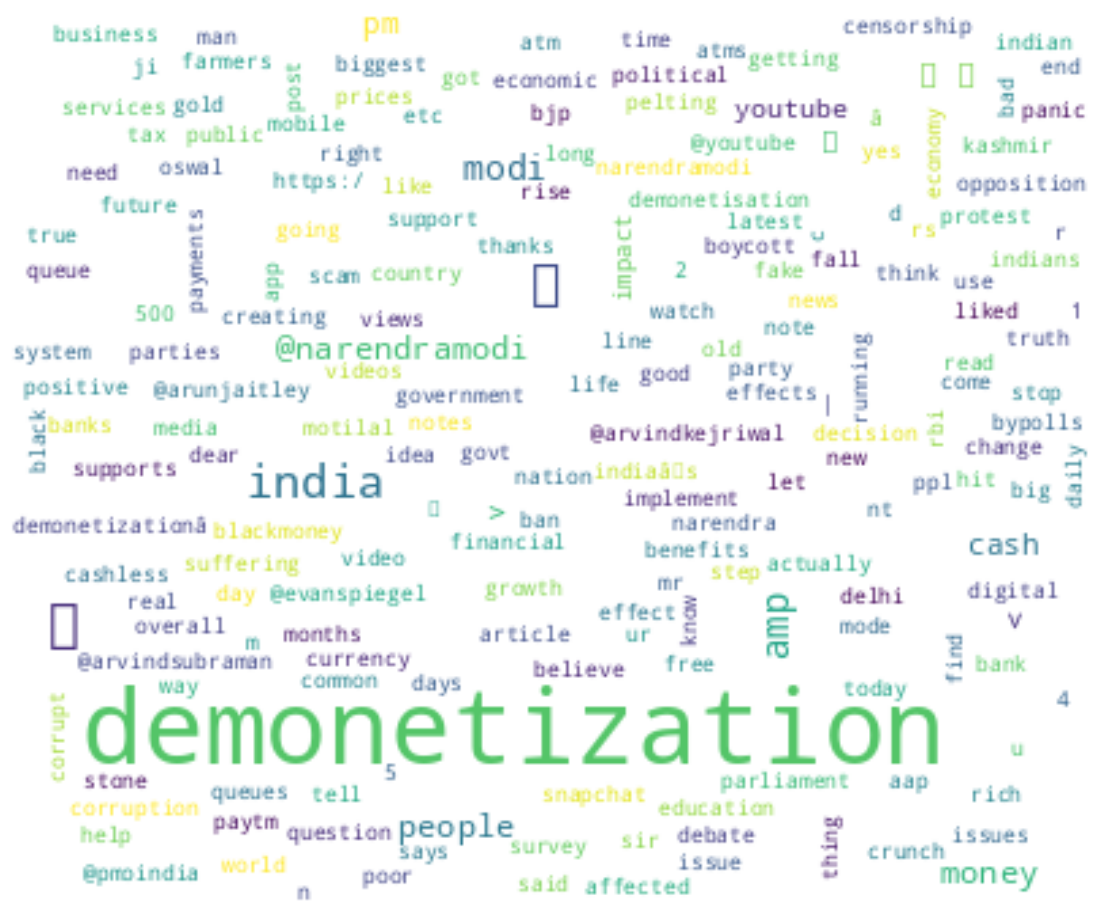

In [76]:
# Generating wordcloud
generate_wordcloud(word_freq)

## Text Cleaning - Part-2

In [77]:
# Combining tokens into a text
combined_tweets=' '.join([token.text for token in tokens])

In [78]:
# Removing "\r\n", "amp", "<", ">" from the text
combined_tweets=re.sub('(\r\n|amp|<|>)+','',combined_tweets)

In [79]:
# Creating Doc object
doc=nlp(combined_tweets)

In [80]:
# Removing whitespaces
tokens=[token for token in doc if (token.is_space==False)]

In [81]:
# Getting word frequencies
word_freq=gen_freq(tokens)

demonetization    4780
india              731
modi               402
@narendramodi      328
money              325
people             318
pm                 287
cash               283
youtube            255
impact             186
black              163
like               163
digital            153
@youtube           149
support            146
govt               133
u                  127
bjp                127
poor               123
notes              120
Name: count, dtype: int64


In [82]:
print('No. of unique words=>',len(word_freq))

No. of unique words=> 14352


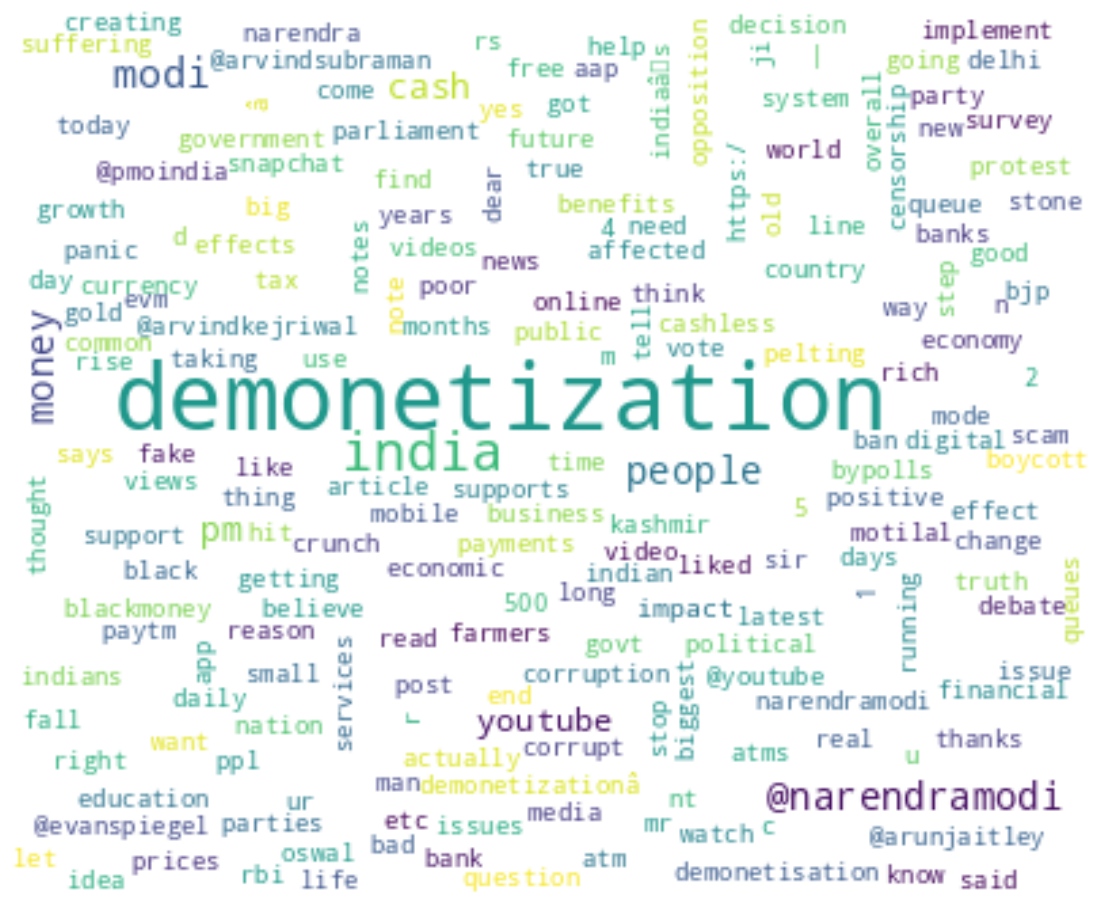

In [83]:
# Generating wordcloud
generate_wordcloud(word_freq)

In [84]:
combined_tweets=re.sub('https:/','',combined_tweets)
combined_tweets=re.sub('@', '', combined_tweets)
combined_tweets = re.sub('\d', '', combined_tweets)

In [85]:
doc = nlp(combined_tweets)

In [86]:
words = [token for token in doc]

In [87]:
word_freq = gen_freq(words)

demonetization    4782
/                 2950
/t.co             2913
                  1738
                  1643
                 1347
\r                1128
india              731
youtube            404
modi               402
narendramodi       369
money              325
people             318
                  295
pm                 291
\r \r              284
cash               283
impact             186
black              163
like               163
Name: count, dtype: int64


In [88]:
len(word_freq)

13830

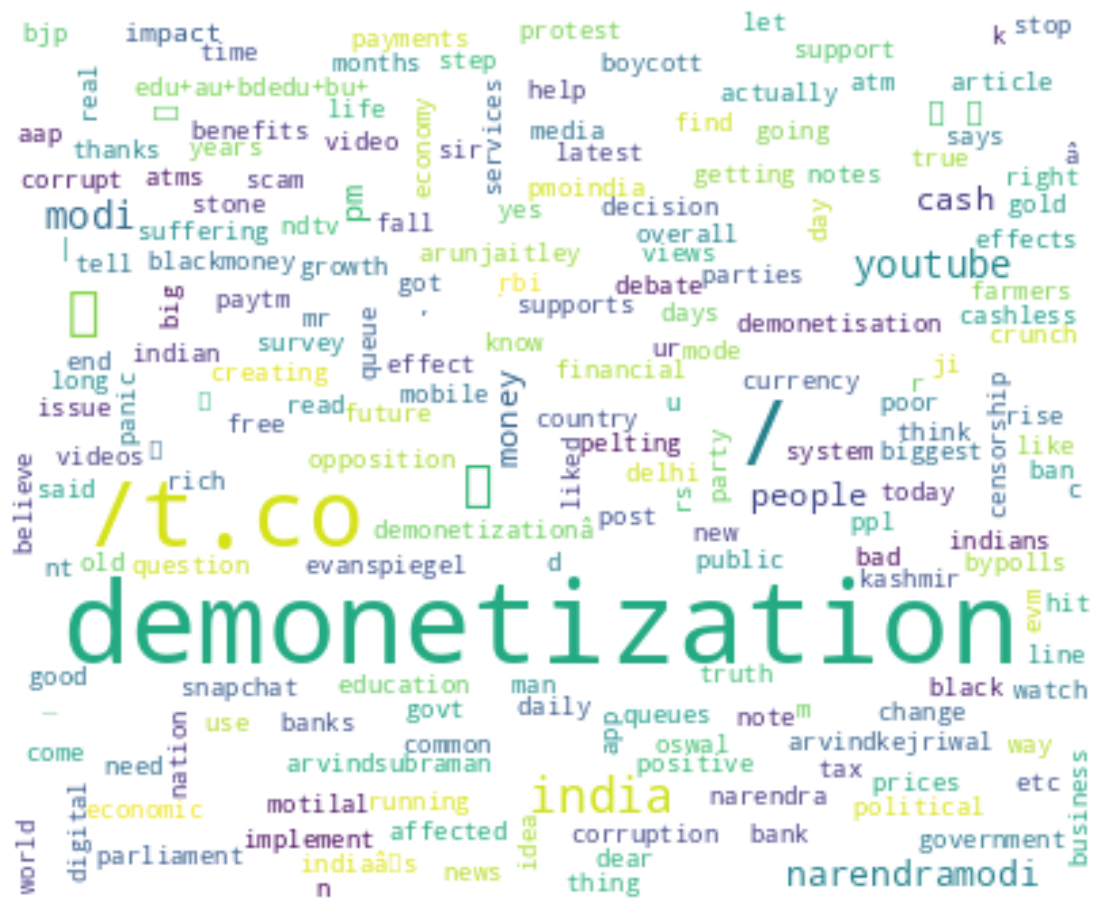

In [89]:
generate_wordcloud(word_freq)